#Data Loading

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#Preprocessing

In [3]:
from sklearn.model_selection import train_test_split

df = df.drop(['Unnamed: 0', 'id'], axis=1)
df_features = df.drop('satisfaction', axis=1)
df_target = (df['satisfaction'] == 'satisfied').astype('int')

X_train, X_val, y_train, y_val = train_test_split(df_features, df_target, test_size=0.2)
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
39061,Female,Loyal Customer,34,Personal Travel,Eco,2688,3,5,3,4,...,5,4,3,3,5,5,5,5,1,0.0
26875,Female,Loyal Customer,26,Personal Travel,Eco,1013,2,2,2,2,...,1,3,1,5,2,2,2,3,0,0.0
13796,Female,disloyal Customer,42,Business travel,Eco,427,4,3,4,3,...,3,5,4,3,5,5,4,5,0,0.0
73714,Female,Loyal Customer,50,Personal Travel,Eco,1608,1,2,1,3,...,4,3,3,1,3,1,3,1,0,0.0
91843,Female,Loyal Customer,59,Business travel,Business,547,3,2,2,2,...,3,3,3,3,3,4,3,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81604,Female,Loyal Customer,39,Business travel,Business,2805,4,4,4,4,...,3,4,4,4,4,1,4,3,0,0.0
74773,Male,Loyal Customer,25,Personal Travel,Eco,992,1,1,1,3,...,1,1,1,5,3,3,3,1,24,15.0
63459,Female,Loyal Customer,36,Personal Travel,Eco,650,2,4,2,3,...,1,1,4,4,5,2,1,1,36,38.0
75029,Male,Loyal Customer,25,Business travel,Business,1521,3,4,2,4,...,3,3,4,1,3,4,4,3,0,0.0


In [4]:
y_train.value_counts(normalize=True)

0    0.567268
1    0.432732
Name: satisfaction, dtype: float64

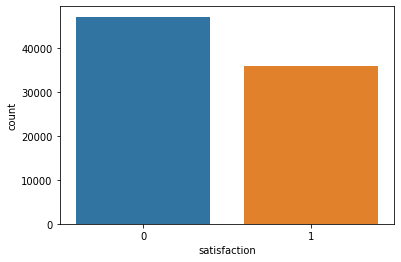

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

#Modeling

##기준모델

In [6]:
from sklearn.metrics import classification_report

pred = y_train.mode()[0]
pred = [pred] * len(y_val)

print(classification_report(y_val, pred))
len(y_train)

              precision    recall  f1-score   support

           0       0.56      1.00      0.72     11726
           1       0.00      0.00      0.00      9055

    accuracy                           0.56     20781
   macro avg       0.28      0.50      0.36     20781
weighted avg       0.32      0.56      0.41     20781



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


83123

##Decision Tree

In [7]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('dt', DecisionTreeClassifier())
])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
dists = {
    'dt__max_depth':range(1, 15),
    'dt__min_samples_split':range(2, 30),
    'dt__min_samples_leaf':range(1, 20)
}

randomCV = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

randomCV.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('ordinalencoder',
                                                               OrdinalEncoder()),
                                                              ('simpleimputer',
                                                               SimpleImputer())])),
                                             ('dt', DecisionTreeClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'dt__max_depth': range(1, 15),
                                        'dt__min_samples_leaf': range(1, 20),
                                        'dt__min_samples_split': range(2, 30)},
                   scoring='accuracy', verbose=1)

In [9]:
pipe_best = randomCV.best_estimator_
pred = pipe_best.predict(X_val)

print(classification_report(y_val, pred))
randomCV.best_params_

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11726
           1       0.96      0.92      0.94      9055

    accuracy                           0.95     20781
   macro avg       0.95      0.94      0.95     20781
weighted avg       0.95      0.95      0.95     20781



{'dt__max_depth': 13, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 9}

##Random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_jobs=-1, oob_score=True))
])

In [11]:
dists = {
    # 'rf__n_estimators':range(100, 300),
    'rf__max_depth':range(1, 15),
    'rf__min_samples_split':range(2, 30),
    'rf__min_samples_leaf':range(1, 20)
}

randomCV = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

randomCV.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('ordinalencoder',
                                                               OrdinalEncoder()),
                                                              ('simpleimputer',
                                                               SimpleImputer())])),
                                             ('rf',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     oob_score=True))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'rf__max_depth': range(1, 15),
                                        'rf__min_samples_leaf': range(1, 20),
                                        'rf__min_samples_split': range(2, 30)},
                   scoring='accuracy', verbose=1)

In [12]:
from sklearn.metrics import classification_report

pipe_best = randomCV.best_estimator_
pred = pipe_best.predict(X_val)

print(classification_report(y_val, pred))
randomCV.best_params_

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11726
           1       0.95      0.93      0.94      9055

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



{'rf__max_depth': 14, 'rf__min_samples_leaf': 9, 'rf__min_samples_split': 7}

##XGBoost

In [13]:
from xgboost import XGBClassifier

# pipe = make_pipeline(
#     OrdinalEncoder(),
#     SimpleImputer(),
#     XGBClassifier(n_estimators=300
#                   , n_jobs=-1
#                   , max_depth=15
#                   , learning_rate=0.2
#                  )
# )

# eval_set = [(X_train, y_train), 
#             (X_val, y_val)]

# pipe.fit(X_train, y_train)#, xgbclassifier__eval_set=eval_set, xgbclassifier__eval_metric='error', xgbclassifier__early_stopping_rounds=50)

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

model = XGBClassifier(n_estimators=300
                  , n_jobs=-1
                  , max_depth=5
                  , learning_rate=0.2
                 )

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, eval_set=eval_set, eval_metric='error', early_stopping_rounds=50)

[0]	validation_0-error:0.093849	validation_1-error:0.098696
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.092261	validation_1-error:0.09653
[2]	validation_0-error:0.088207	validation_1-error:0.092392
[3]	validation_0-error:0.082324	validation_1-error:0.085655
[4]	validation_0-error:0.082673	validation_1-error:0.086377
[5]	validation_0-error:0.080952	validation_1-error:0.083634
[6]	validation_0-error:0.074275	validation_1-error:0.078918
[7]	validation_0-error:0.070185	validation_1-error:0.07502
[8]	validation_0-error:0.068958	validation_1-error:0.073336
[9]	validation_0-error:0.067033	validation_1-error:0.071796
[10]	validation_0-error:0.066239	validation_1-error:0.071315
[11]	validation_0-error:0.06275	validation_1-error:0.067754
[12]	validation_0-error:0.06121	validation_1-error:0.06607
[13]	validation_0-error:0.059057	validation_1-error:0.064289


XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=-1)

In [14]:
y_pred = model.predict(X_val_encoded)

print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     12026
           1       0.94      0.97      0.95      8755

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



##Final model (XGBoost)

In [15]:
df_test = pd.read_csv('/content/test.csv')
df_test = df_test.drop(['Unnamed: 0', 'id'], axis=1)
X_test = df_test.drop('satisfaction', axis=1)
y_test = (df_test['satisfaction'] == 'satisfied').astype('int')
X_test_encoded = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


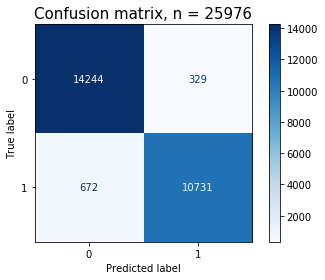

In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, X_test_encoded, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [17]:
y_pred = model.predict(X_test_encoded)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     14916
           1       0.94      0.97      0.96     11060

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [18]:
from sklearn.metrics import roc_curve

y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})

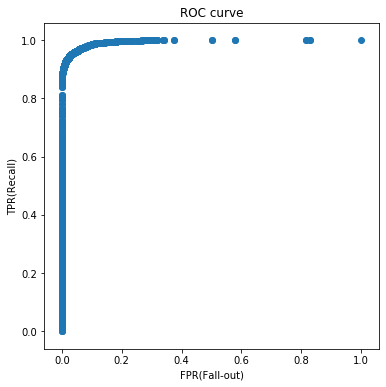

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

#Interpreting Model

##Permutaion Importances

In [20]:
!pip install eli5

In [21]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
)

permuter.fit(X_val_encoded, y_val);

In [22]:
eli5.show_weights(
    permuter, 
    top=22,
    feature_names=list(X_val_encoded.columns)
)

Weight,Feature
0.1490 ± 0.0010,Inflight wifi service
0.1463 ± 0.0036,Type of Travel
0.0614 ± 0.0024,Customer Type
0.0265 ± 0.0010,Online boarding
0.0249 ± 0.0022,Baggage handling
0.0192 ± 0.0020,Inflight service
0.0188 ± 0.0021,Checkin service
0.0152 ± 0.0011,Seat comfort
0.0084 ± 0.0012,Cleanliness
0.0061 ± 0.0001,Gate location


In [23]:
df_feature_importance = pd.Series(model.feature_importances_, X_val.columns)
df_feature_importance.sort_values(ascending=False)

Online boarding                      0.411787
Type of Travel                       0.155600
Inflight wifi service                0.093200
Customer Type                        0.058958
Inflight entertainment               0.036069
Checkin service                      0.035985
Class                                0.033992
On-board service                     0.028482
Leg room service                     0.021744
Seat comfort                         0.021187
Cleanliness                          0.020144
Baggage handling                     0.017482
Inflight service                     0.016008
Gate location                        0.015586
Departure/Arrival time convenient    0.006303
Age                                  0.005614
Ease of Online booking               0.005299
Arrival Delay in Minutes             0.005130
Flight Distance                      0.003895
Food and drink                       0.003181
Gender                               0.002242
Departure Delay in Minutes        

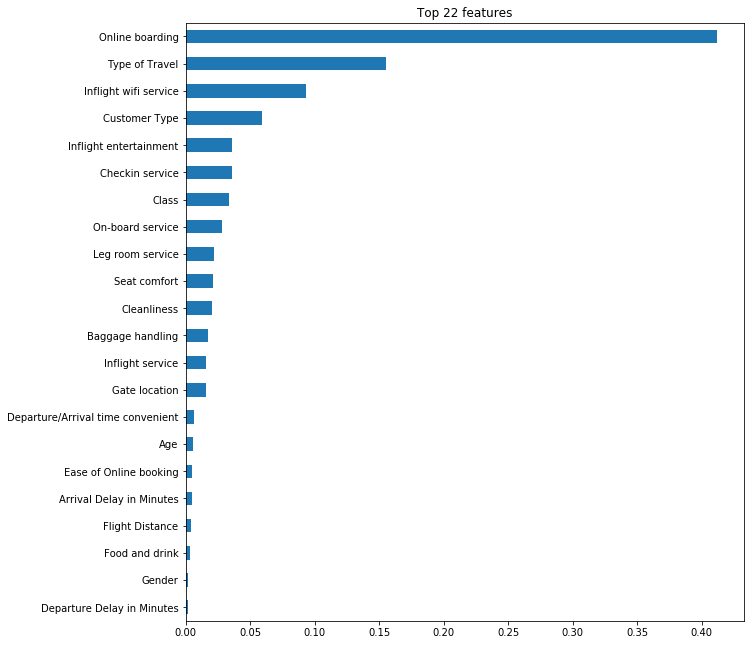

In [24]:
import matplotlib.pyplot as plt

n = 22
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
df_feature_importance.sort_values()[-n:].plot.barh();

##PDP

In [25]:
!pip install pdpbox

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


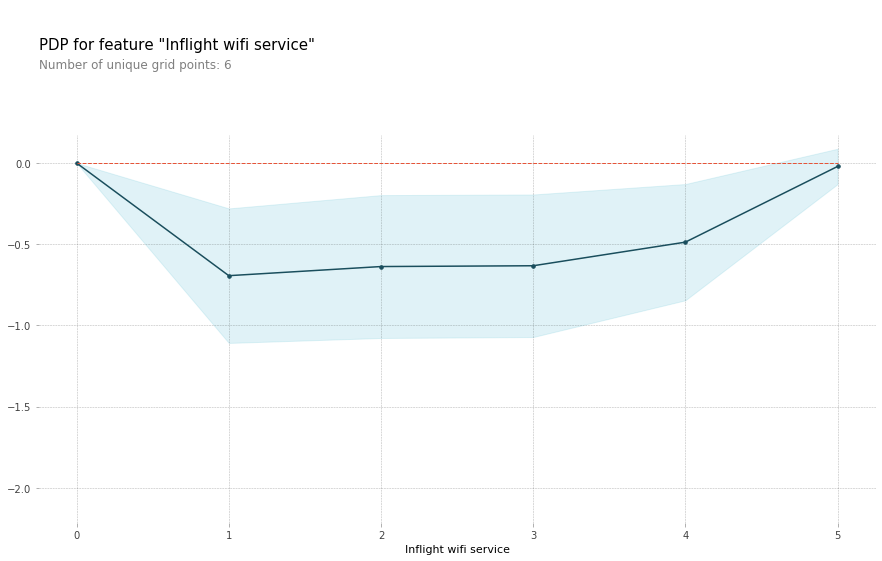

In [26]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Inflight wifi service'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

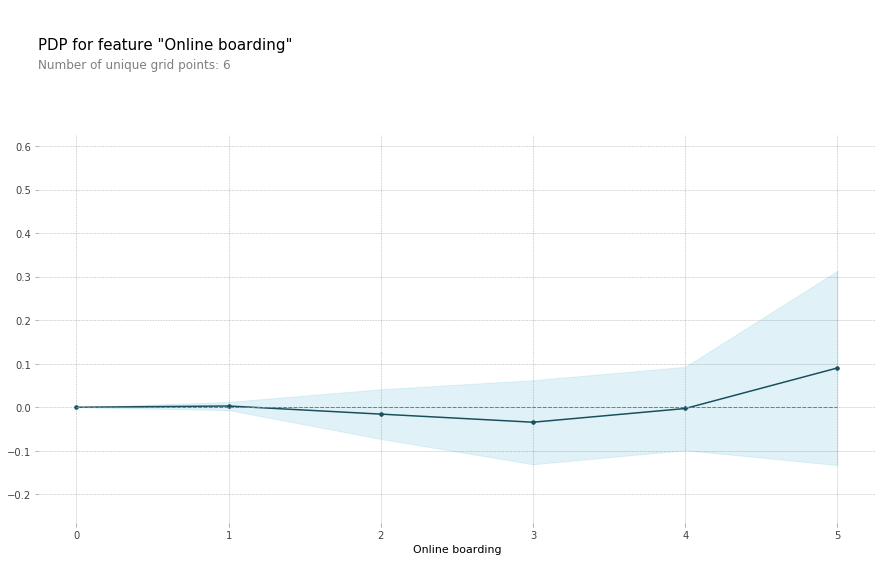

In [27]:
feature = 'Online boarding'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

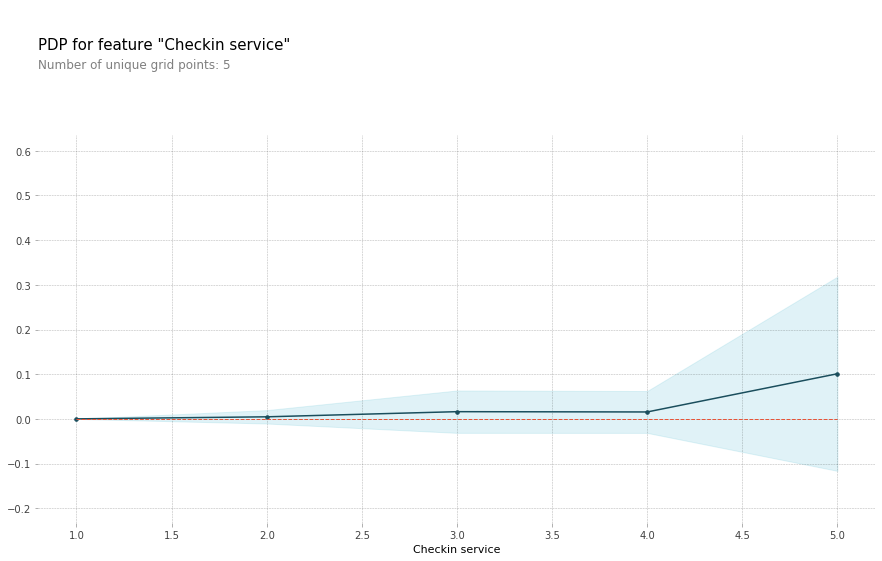

In [28]:
feature = 'Checkin service'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

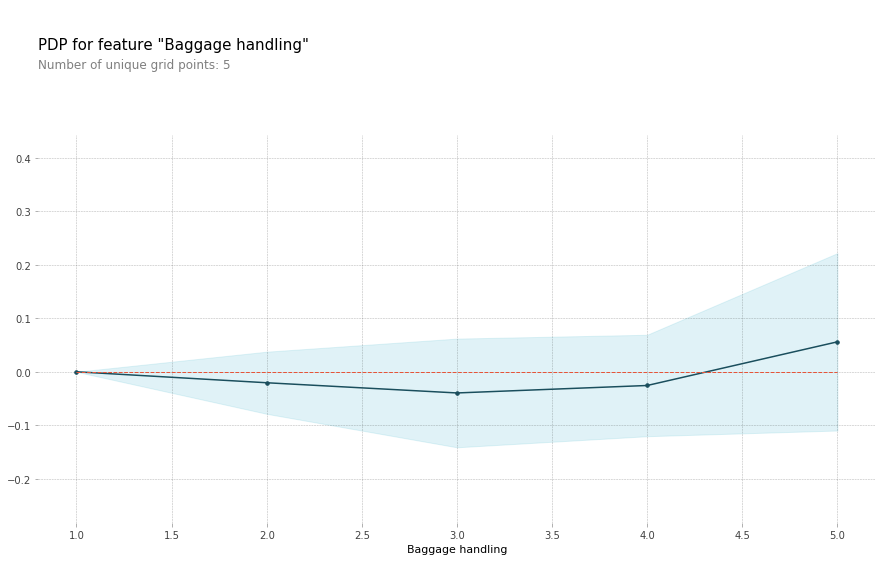

In [29]:
feature = 'Baggage handling'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

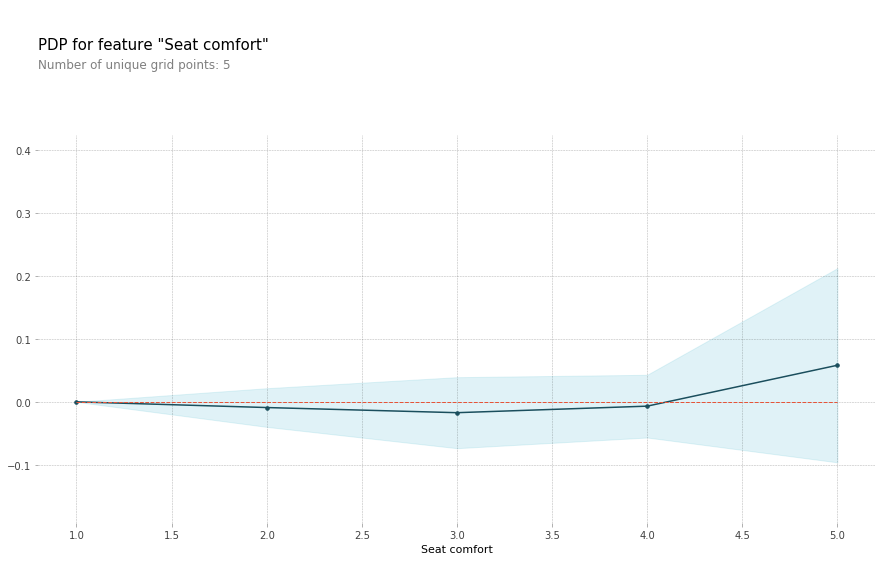

In [30]:
feature = 'Seat comfort'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

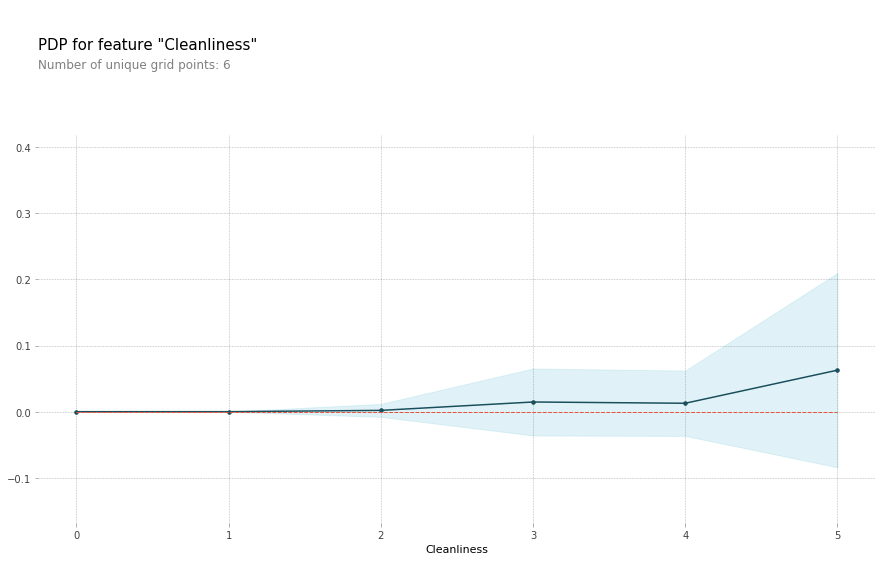

In [31]:
feature = 'Cleanliness'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

##SHAP

In [32]:
!pip install shap

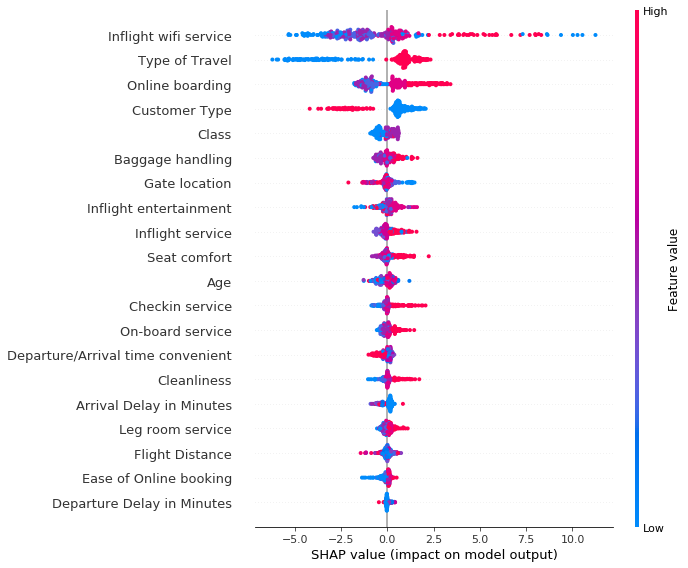

In [33]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val_encoded.iloc[:300])
shap.summary_plot(shap_values, X_val_encoded.iloc[:300])

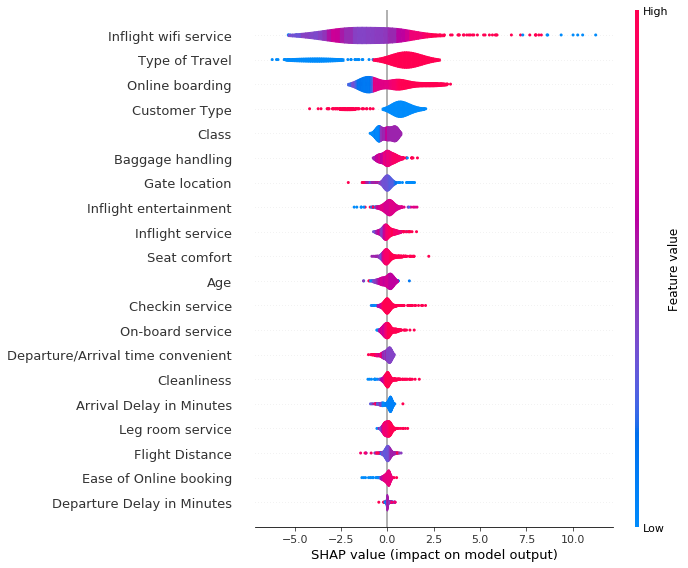

In [34]:
shap.summary_plot(shap_values, X_val_encoded.iloc[:300], plot_type="violin")

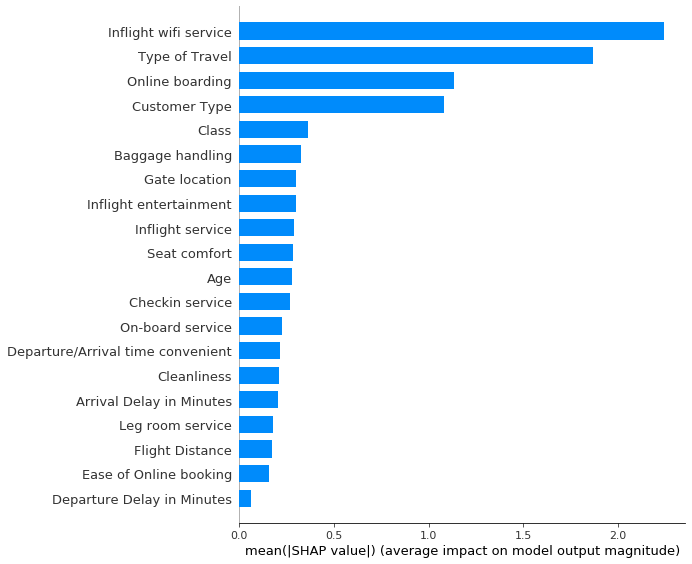

In [35]:
shap.summary_plot(shap_values, X_val_encoded.iloc[:300], plot_type="bar")